# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of his years’ survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [7]:
#Load our dataframe account for the index columns
tsdf = pd.read_csv('case_study.csv', index_col=0)

/Users/jventura/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
tsdf.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [9]:
# Quickly check to see the size of our DF, both rows and columns
tsdf.shape

(34545, 358)

In [14]:
tsdf['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [15]:
# your code here
tsdf = tsdf[tsdf['_STATE'].isin([9,34,36])]

Now check to see how large our subset df.

In [16]:
tsdf.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [17]:
tsdf['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

**PHYSHLTH** only admits answer choices 1-30 for # of days sick in the last month but the mean value,as is, is 60. Lets investigate.

## 1. Handle the non-normal values

As seen from the data dictionary, there are a number of responses that are coded with values that throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [18]:
# the value of 88 is coded as None, so they should be coded as 0 days sick,
# lets recode it appropriately.

# for 77 and 99's we prepare to drop these entries as these entries don't
# contribute to making inferences/ statements.

* Check lengths of non-normal values to validate the data frame shape after cleaning

Code Values:
 * 88: 'None' or no days, over the last 30, where felt physically ill
 * 77: 'Don't know / not sure'
 * 99: 'refused to answer'

In [19]:
len(tsdf[tsdf.PHYSHLTH == 88.0])

21296

In [20]:
len(tsdf[tsdf.PHYSHLTH == 77.0])

493

In [21]:
len(tsdf[tsdf.PHYSHLTH == 99.0])

305

In [22]:
'the total number of unusable values is ' + str(493+305)

'the total number of unusable values is 798'

In [23]:
# create dictionary of non-normal value: replacement value pairs 
# and replace in pandas series.

zero_dict = {88.0:0, 77.0: np.nan, 99.0 : np.nan}
tsdf['PHYSHLTH'] = tsdf['PHYSHLTH'].replace(zero_dict)

In [24]:
# drop the nan values
tsdf.dropna(subset=['PHYSHLTH'], inplace= True)

In [25]:
tsdf.shape

(33747, 358)

In [26]:
# verfiying shape pre-nan removal and post-nan removal agree
34545 - 33747 

798

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [27]:
# descriptive statistics
tsdf.PHYSHLTH.describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

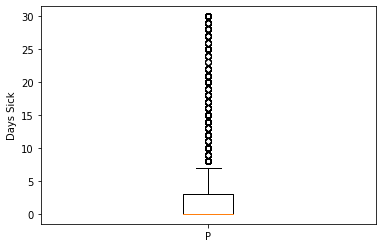

In [28]:
fig, ax = plt.subplots()
ax.boxplot(tsdf.PHYSHLTH)
ax.set_xticklabels('PHYSHLTH')
ax.set_ylabel('Days Sick')
plt.show()

In [29]:
#ANS

In [30]:
tsdf = tsdf[tsdf['PHYSHLTH']!= 77]
tsdf = tsdf[tsdf['PHYSHLTH']!= 99]

In [31]:
tsdf.PHYSHLTH.describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

Text(0.5, 1.0, 'People Sick Day Distribution')

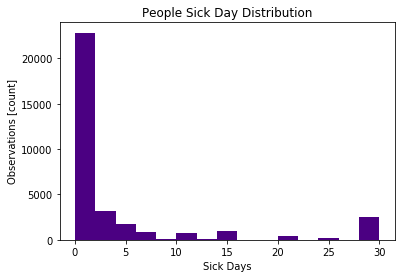

In [32]:
fig, ax =plt.subplots()

ax.hist(tsdf.PHYSHLTH,color = 'indigo', bins=15)

ax.set_xlabel('Sick Days')
ax.set_ylabel('Observations [count]')
ax.set_title('People Sick Day Distribution')

In [33]:
#ANS # graphic the distribution of data

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [34]:
# compute the avg days sick by state.
tsdf.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

In [35]:
# ANS # code to calculate the average number of sick days by state

In [36]:
# obtain np array of means from the pandas series. (in order to operate on)
state_sd_mean = tsdf.groupby('_STATE')['PHYSHLTH'].mean().values
states = ['CT','NJ','NY']

Text(0.5, 1.0, 'Comparing Health by State')

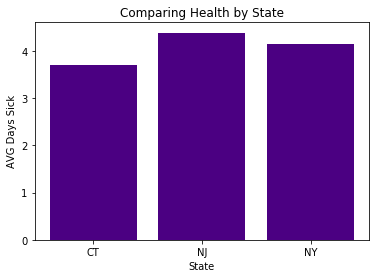

In [37]:
fig, ax = plt.subplots()
ax.bar(states, state_sd_mean, color='indigo')

plt.xlabel('State')
plt.ylabel('AVG Days Sick')
plt.title('Comparing Health by State')

In [38]:
#ANS # code to graph those averages using matplotlib


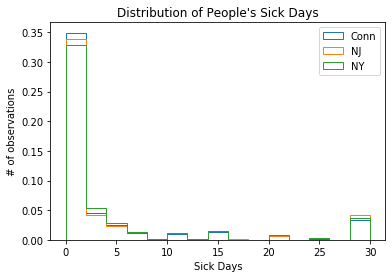

In [39]:
# Overplot tri-state sick-day distributions 
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(tsdf[tsdf['_STATE']==9]['PHYSHLTH'], bins=15, density=True, histtype='step', label='Conn')
ax.hist(tsdf[tsdf['_STATE']==34]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NJ')
ax.hist(tsdf[tsdf['_STATE']==36]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NY')

# Set labels and title
ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")
ax.legend()

In [40]:
#ANS # graphic showing the histogram of data.

## 4. Turn the number of sick days into a classification of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [92]:
# create new column of entries coded as chronically sick.
# **assumption: responses of x > 12 are chronically sick.

tsdf['chron'] = np.where(tsdf['PHYSHLTH'] >= 12, 1, 0)

In [93]:
# quick check of the entries of a random sample.
tsdf.chron.sample(10)

295381    1
294109    0
295687    0
283747    1
297879    0
296472    1
273425    1
292176    1
283041    0
58061     0
Name: chron, dtype: int64

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [43]:
# calculate avg days sick per state.
chron_means = tsdf.groupby('_STATE')['chron'].mean().values
tsdf.groupby('_STATE')['chron'].mean()

_STATE
9.0     0.114568
34.0    0.139117
36.0    0.128915
Name: chron, dtype: float64

Text(0.5, 1.0, 'State Health Comparison')

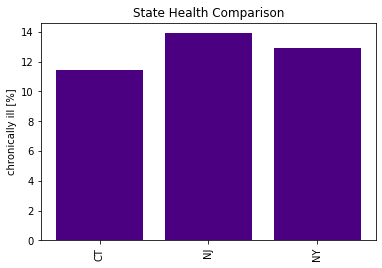

In [44]:
# code to calculate averages per state
# create graphic to compare chronically sick by state
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(states, chron_means, color = 'indigo')

# Set labels and title
ax.set_xticklabels(['CT', 'NJ', 'NY'], rotation=90)
ax.set_yticklabels([0,2,4,6,8,10,12,14])
ax.set_ylabel("chronically ill [%]")
ax.set_title('State Health Comparison')

In [45]:
# ANS -  create graphic to compare chronically sick by state


## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

Following from the data cookbook, the code values are:

* 1 - Everyday
* 2 - Somedays
* 3 - Not at all ; Go to Section 09.04 LASTSMK2
* 7 - Don't know ; Not Sure—Go to Section 09.05 USENOW3
* 9 - Refused ; Go to Section 09.05 USENOW3
* BLANK

the SMOKE100 (how many cigarettes in the last 100 days) field contains responsed that can be sourced into SMOKDAY2
entries

In [46]:
tsdf.SMOKDAY2.value_counts(), 'sum = ' + str(tsdf.SMOKDAY2.value_counts().sum())

(3.0    9494
 1.0    2611
 2.0    1336
 9.0      21
 7.0       6
 Name: SMOKDAY2, dtype: int64,
 'sum = 13468')

In [47]:
# ANS your code here

In [48]:
len(tsdf.SMOKDAY2)

33747

In [49]:
# create new smoking column which compiles all results

# Entries in smoke100 with code 2 are 'no' responses so encode as 
# '3-not at all'in smokday 2 else 
tsdf['smoking'] = np.where(tsdf['SMOKE100']==2,3, tsdf['SMOKDAY2'])

# check total values after update, which should equal 33743- non smokers (323259)
tsdf['smoking'].value_counts().sum()

32153

In [50]:
# Entries in smok100 with code 7,9 are coded with same response in smokday2
tsdf['smoking'] = np.where(tsdf['SMOKE100']==7, 7, tsdf['smoking'])
tsdf['smoking'] = np.where(tsdf['SMOKE100']==9, 9, tsdf['smoking'])

In [51]:
(tsdf.smoking.value_counts().sum(),tsdf.smoking.count())

(32359, 32359)

In [52]:
#compute smoking, non-smoking averages 
smoking_avgs = tsdf['smoking'].value_counts()/tsdf['smoking'].count()
smoking_avgs

3.0    0.870824
1.0    0.080689
2.0    0.041287
7.0    0.005161
9.0    0.002040
Name: smoking, dtype: float64

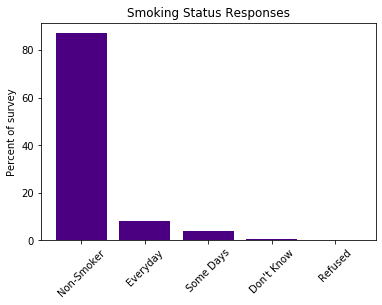

In [53]:
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], smoking_avgs, color='indigo')

# Set title and lables
ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=45)
ax.set_yticklabels([0,20,40,60,80])
ax.set_ylabel("Percent of survey")
ax.set_title('Smoking Status Responses')

plt.show()

In [54]:
# code to graph those proportion of different smoking groups using matplotlib


In [94]:
# compute the response sums by response by state 
tsdf.groupby(['_STATE', 'smoking'])['smoking'].count()

_STATE  smoking
9.0     1.0         706
        2.0         344
        3.0        8870
        7.0          65
        9.0          26
34.0    1.0         901
        2.0         480
        3.0        9595
        7.0          74
        9.0          14
36.0    1.0        1004
        2.0         512
        3.0        9714
        7.0          28
        9.0          26
Name: smoking, dtype: int64

In [95]:
# replace the codings with descriptions and create new column with 
# response category

repl_dict = {3:'none', 
             2: 'some',
             1: 'every',
             7: 'unknown',
             9: 'unknown'}

tsdf['smoking_cat'] = tsdf['smoking'].replace(repl_dict)
 

In [96]:
#create new frame with data on state percentage smoking categories
state_percentage = pd.DataFrame(tsdf.groupby(by = '_STATE')['smoking_cat'].value_counts(normalize = True) * 100)
state_percentage

smoking_cat
_STATE smoking_cat             
9.0    none           88.602537
       every           7.052243
       some            3.436220
       unknown         0.909000
34.0   none           86.722704
       every           8.143529
       some            4.338395
       unknown         0.795372
36.0   none           86.086494
       every           8.897554
       some            4.537398
       unknown         0.478554

In [58]:
state_percentage.unstack()

smoking_cat                               
smoking_cat       every       none      some   unknown
_STATE                                                
9.0            7.052243  88.602537  3.436220  0.909000
34.0           8.143529  86.722704  4.338395  0.795372
36.0           8.897554  86.086494  4.537398  0.478554

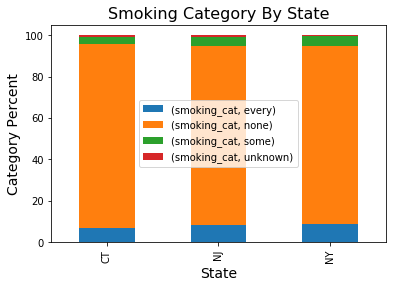

In [59]:
# create a stacked histogram 
state_percentage.unstack().plot(kind='bar', stacked=True)
plt.xlabel('State', fontsize=14)
plt.xticks([0,1,2],labels= ['CT','NJ','NY'])
plt.ylabel('Category Percent',fontsize=14)
plt.title('Smoking Category By State', fontsize=16)
plt.legend(loc = 0)

In [60]:
#ANS - graph showing the breakdown of smokers per state.

In [61]:
category_avg = tsdf.groupby('smoking_cat')['PHYSHLTH'].mean()
category_std = tsdf.groupby('smoking_cat')['PHYSHLTH'].std()
category_avg

smoking_cat
every      6.653007
none       3.764435
some       6.295659
unknown    4.081545
Name: PHYSHLTH, dtype: float64

Text(0.5, 1.0, 'Average Days Sick by Smoking Status')

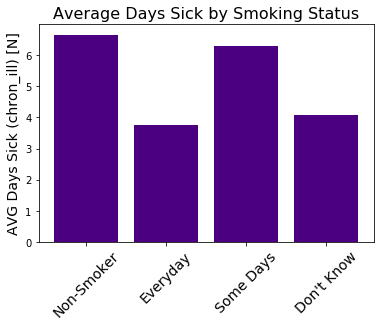

In [65]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Every', 'Non', 'Some',"unknown"], category_avg, color='indigo')

# Set title and lables
ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know"], rotation=45, fontsize=14)
ax.set_ylabel("AVG Days Sick (chron_ill) [N]", fontsize=14)
ax.set_title('Average Days Sick by Smoking Status', fontsize=16)

In [63]:
# code to graph these averages sick days for each category of smoking status

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [66]:
# code here to clean up the ALCDAY5 responses
alc_dict = {888:0,
           777: np.nan,
           999: np.nan
           }
tsdf['alcohol'] = tsdf['ALCDAY5'].replace(alc_dict)

In [67]:
#descriptive statistics of cleaned data
tsdf.alcohol.describe()

count    31532.000000
mean       107.654129
std         95.274739
min          0.000000
25%          0.000000
50%        103.000000
75%        203.000000
max        230.000000
Name: alcohol, dtype: float64

In [68]:
# define function to decode responses in ALCDAY5: days/week, days/month,
# in the last 30 days had at least one alcoholic beverage.
# 1--: days per week , 2--: days per month.

def calc_monthly(x):
    if x>200:
        return x-200
    elif x>100:
        return min( (x-100)*4.34524 , 30 )
    else:
        return x

In [69]:
tsdf.alcohol = tsdf.alcohol.apply(calc_monthly)

In [70]:
#check numbers now agree with decoded response values.
tsdf.alcohol.describe() 

count    31532.000000
mean         5.495244
std          8.423029
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: alcohol, dtype: float64

/Users/jventura/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jventura/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


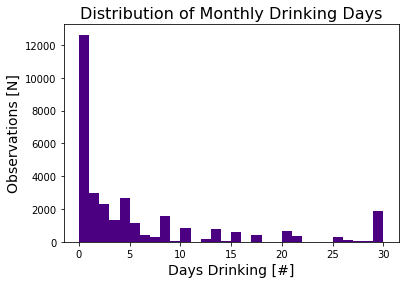

In [71]:
fig, ax = plt.subplots()

# Plot a histogram of "drinking day distribution" 

ax.hist(tsdf['alcohol'], bins=30, color='indigo')

ax.set_xlabel('Days Drinking [#]', fontsize = 14)
ax.set_ylabel('Observations [N]', fontsize = 14)
ax.set_title("Distribution of Monthly Drinking Days", fontsize=16)

plt.show()

In [72]:
# ANS - graphic showing the histogram of data

In [73]:
alcohol_state = tsdf.groupby(['_STATE'])['alcohol'].mean().values
tsdf.groupby(['_STATE'])['alcohol'].mean()

_STATE
9.0     6.199627
34.0    5.057856
36.0    5.301178
Name: alcohol, dtype: float64

In [74]:
# ANS code to calculate averages per state

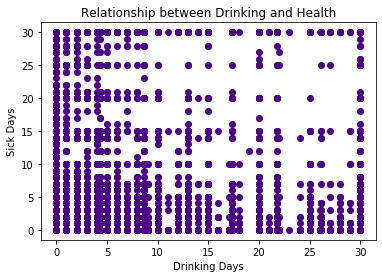

In [75]:
fig, ax = plt.subplots()

ax.scatter(tsdf["alcohol"], tsdf["PHYSHLTH"],color = 'indigo')

ax.set_xlabel("Drinking Days")
ax.set_ylabel("Sick Days")
ax.set_title('Relationship between Drinking and Health')


plt.show()

In [76]:
tsdf[['PHYSHLTH', 'alcohol']].corr()['PHYSHLTH']

PHYSHLTH    1.000000
alcohol    -0.091154
Name: PHYSHLTH, dtype: float64

In [77]:
# ANS Code to calculate correlation of between number of drinks of number of days physically ill

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

In [78]:
import scipy.stats as stats



mu = tsdf.PHYSHLTH.mean()

stdev = np.std(tsdf.PHYSHLTH)/np.sqrt(len(tsdf.PHYSHLTH))
confidence_interval = stats.norm.interval(alpha = 0.95,
                 loc = mu,
                 scale = stdev)



print('We are 95% confident that the population mean of days physically ill in the ' + '\n'
      + 'in the tri-state area is between: '+ str(confidence_interval))

We are 95% confident that the population mean of days physically ill in the 
in the tri-state area is between: (3.9945125255385756, 4.176169312847059)


-  Create a 95% confidence interval for the true proportion of chronically sick people.

In [79]:
tsdf.chron.sample(10)

58066     0
274340    0
276198    0
295197    0
51102     0
279009    1
292789    0
296766    1
50156     1
277926    1
Name: chron, dtype: int64

In [101]:

mu_chron = tsdf.chron.mean()

stderr_chron = np.std(tsdf.chron)/np.sqrt(len(tsdf.chron))

confidence_interval_chron = stats.norm.interval(alpha = 0.95,
                 loc = mu_chron,
                 scale = stderr_chron)




print('We are 95% confident that the population proportion of persons chronically' + '\n'
      + 'ill in the tri-state area is between ' + str(confidence_interval_chron) + ' percent.')

We are 95% confident that the population proportion of persons chronically
ill in the tri-state area is between (0.12438822332438251, 0.13151600519963444) percent.


## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

In [81]:
#1.) H_0 = p_men - p_women = 0 ; H_A : p_men - p_women != 0  "proportions of men sick v ... women sick"

In [106]:
tsdf['male_sick'] = tsdf.SEX.map(lambda x : 1 if x==1.0 else 0)
tsdf['female_sick'] = tsdf.SEX.map(lambda x : 1 if x==2.0 else 0)

In [107]:
tsdf.male_sick.mean(), tsdf.female_sick.mean()

(0.43909088215248765, 0.5603757371025573)

In [108]:
tsdf.SEX.value_counts()

2.0    18911
1.0    14818
9.0       18
Name: SEX, dtype: int64

In [85]:
18911+14818

33729

In [88]:
(len(tsdf[tsdf['male_sick']==1.0]),tsdf.male_sick.count())

(14818, 33747)

In [105]:
(len(tsdf[tsdf['male_sick']==1.0]),len(tsdf[tsdf['female_sick']==2.0]))

(14818, 0)

In [111]:
tsdf.male_sick.count()

33747

In [115]:
p_woman = (sum(tsdf.female_sick)/tsdf.female_sick.count()
p_woman

0.28018786855127864

In [116]:
#2.) population sdev not known, n>> 30:
#    appropriate statistical test : t-test.

p_hat = (sum(tsdf.male_sick) + sum(tsdf.female_sick)) / 

p_man =  sum(tsdf.male_sick)/tsdf.male_sick.count()
p_woman = sum(tsdf.female_sick)/tsdf.female_sick.count()

z = (p_man-p_woman) / np.sqrt( (p_hat*(1-p_hat))/(2/tsdf.male_sick.count())) 
z
# tsdf.SEX.count()

/Users/jventura/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


-inf

### The following questions are regarding the `PHYSHLTH` variable. 
- What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
- Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


### The following questions are regarding the  `CHRONIC` variable.
- What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
- Is there a statistically significant difference in the percentage of men and women who are chronically sick?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states.

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 

Select a continuous dependent varaible and a binary dependent variable that you would like to investigate. Then select a categorical independent variable with at least 3 groups and for which you will test to see if the response to the independent variable affects outcomes of the dependent variable.

For your continuous dependent variable perform the following:
  - Determine the sample mean and sample standard deviation
  - Create a confidence interval for a population mean.
  - Perform a two-sample test of means for gender.
  - Perform a one-way ANOVA using your categorical independent variable.

Select/create a binary variable from the survey questions as you dependent variable and perform the following:
  - Create a confidence interval for a population proportion.
  - Perform a two proportions z-test using gender.
  - Perform a Chi-Square test using your categorical independent variable.

In [ ]:
zero_dict = {88:0, 
            77: np.nan,
            99: np.nan}

df['MENTHLTH'] = df['MENTHLTH'].replace(zero_dict)
df.dropna(subset=['MENTHLTH'], inplace=True)

In [ ]:
other_dict = {1:'winter', 
            2: 'winter',
            3: 'spring',
            4: 'spring',
            5: 'spring',
            6: 'summer',
            7: 'summer',
            8: 'summer',
            9: 'fall',
            10: 'fall',
            11: 'fall',
            12: 'winter'}

df['int_seasons'] = df['IMONTH'].replace(other_dict)

In [ ]:
m_mean = df['MENTHLTH'].mean()
m_mean

In [ ]:
m_std = df['MENTHLTH'].std()
m_std

In [ ]:
df['MENTHLTH'].value_counts()

In [ ]:
m_n = len(df['MENTHLTH'])
m_n

In [ ]:
conf_int2 = ((m_mean - 1.96*(m_std/m_n**.5)), ((m_mean + 1.96*(m_std/m_n**.5))))
conf_int2

In [ ]:
#two-sample t test
s_men = df.groupby('SEX').MENTHLTH.get_group(1)
s_women = df.groupby('SEX').MENTHLTH.get_group(2)

m_men = df.groupby('SEX').MENTHLTH.get_group(1).mean()
m_women = df.groupby('SEX').MENTHLTH.get_group(2).mean()

In [ ]:
def sample_variance(sample_men):
    sample_mean = np.mean(sample_men)
    return np.sum((sample_men - sample_mean) **2)/ (len(sample_men) -1)

In [ ]:
def pooled_variance(s_men, s_women):
    n_1, n_2 = len(s_men), len(s_women)
    var_1, var_2 = sample_variance(s_men), sample_variance(s_women)
    return ((n_1-1) * var_1 + (n_2-1)* var_2)/((n_1 + n_2)-2)

In [ ]:
def twosample_tstatistic(s_women, s_men):
    wo_mean, ma_mean = np.mean(s_women), np.mean(s_men)
    pool_var = pooled_variance(s_women, s_men)
    n_e, n_c = len(s_women), len(s_men)
    num = wo_mean - ma_mean
    denom = np.sqrt(pool_var * ((1/n_e)+(1/n_c)))
    return num / denom

t_stat = twosample_tstatistic(s_women, s_men)
t_stat

In [ ]:
#one-way ANOVA

stats.f_oneway(df['MENTHLTH'][df['int_seasons'] == 'winter'],
                df['MENTHLTH'][df['int_seasons'] == 'spring'],
                df['MENTHLTH'][df['int_seasons'] == 'summer'],
                df['MENTHLTH'][df['int_seasons'] == 'fall'])

In [ ]:
#Binary Dependant Variable
df['ANX'] = np.where(df['MENTHLTH'] >= 11, 1, 0)

In [ ]:
df["ANX"].value_counts()

In [ ]:
df["ANX"].count()

In [ ]:
proportion = 3599/33747
proportion

In [ ]:
import statsmodels.stats.proportion as smp

In [ ]:
lower,upper = smp.proportion_confint(3599,33288,alpha=0.05,method='normal')
lower,upper

In [ ]:
df.groupby('SEX')['ANX'].get_group(1).value_counts()

In [ ]:
df.groupby('SEX')['ANX'].get_group(2).value_counts()

In [ ]:
x1 = df[df['SEX'] == 1]['ANX'].sum()
x2 = df[df['SEX'] == 2]['ANX'].sum()

In [ ]:
n1 = len(df[df['SEX'] == 1])
n2 = len(df[df['SEX'] == 2])

In [ ]:
p_star = (x1+x2)/(n1+n2)

In [ ]:
p_star

In [ ]:
p_male = x1/n1
p_female = x2/n2

In [ ]:
z_test = (p_female-p_male)/(p_star*(1-p_star)*((1/n1)+(1/n2)))**.5
z_test

In [ ]:
df[df['ANX'] == 0]['int_seasons'].value_counts()

In [ ]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [df[df['ANX'] == 0]['int_seasons'].value_counts()], [df[df['ANX'] == 1]['int_seasons'].value_counts()]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')